In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [4]:
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [5]:
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [6]:
data['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [8]:
from mlxtend.preprocessing import minmax_scaling

X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])

X_scaled = minmax_scaling(X, columns=X.columns)

<Axes: xlabel='stress level', ylabel='count'>

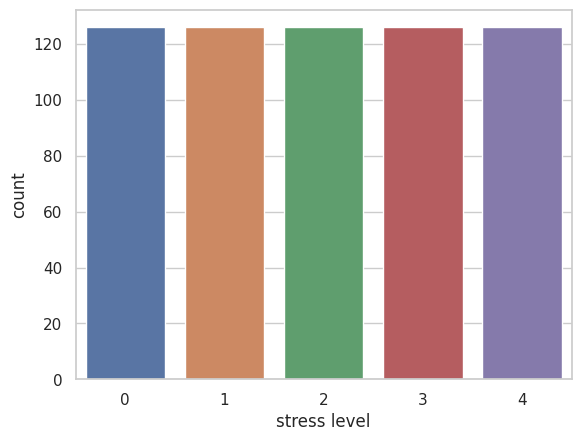

In [9]:
sns.set(style="whitegrid")
sns.countplot(x='stress level', data=data)

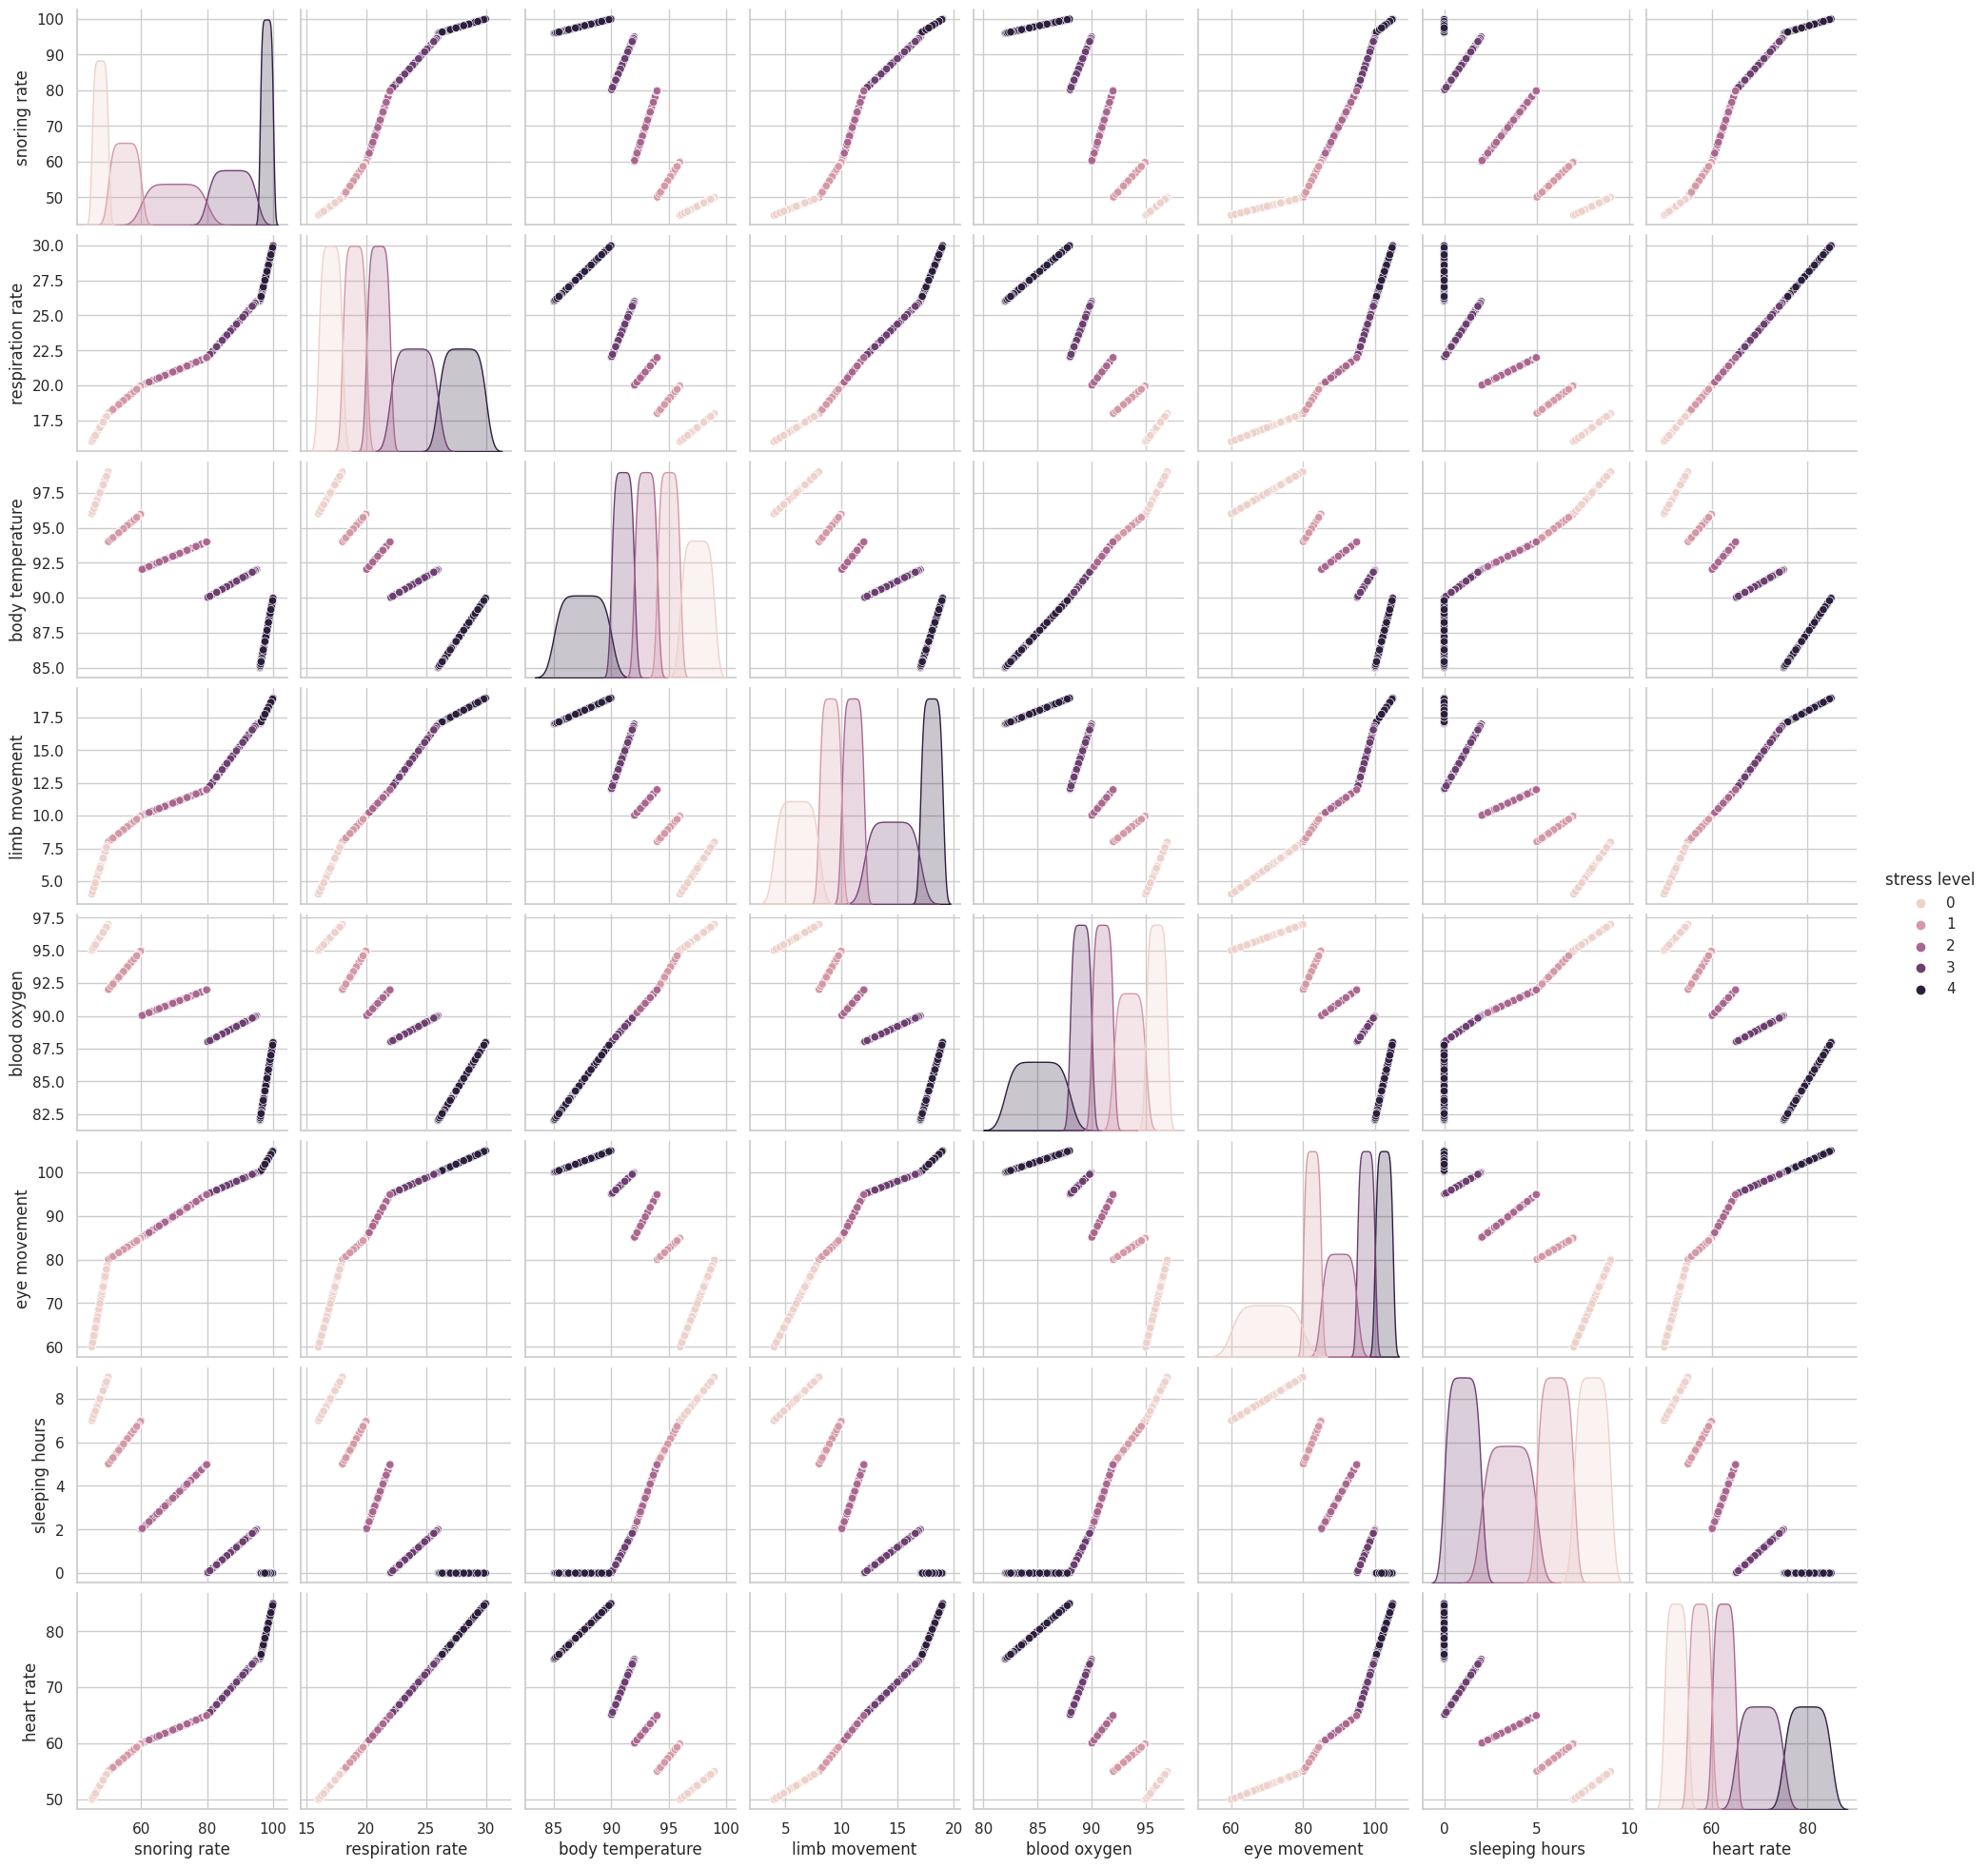

In [10]:
sns.pairplot(data, hue='stress level');

In [12]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
snoring rate,1.598040,0.975322,0.979788
respiration rate,1.594759,0.963516,0.979785
body temperature,1.594276,-0.962354,-0.979785
heart rate,1.594097,0.963516,0.979785
eye movement,1.594078,0.951988,0.979785
blood oxygen,1.592714,-0.961092,-0.979785
limb movement,1.590628,0.971071,0.979785
sleeping hours,1.588304,-0.973036,-0.983435


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify = y, shuffle=True)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)

In [15]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
1,Logistic Regression,100.00
2,Gaussian Naive Bayes,100.00
4,SVC,100.00
6,KNN or k-Nearest Neighbors,100.00
3,Linear SVC,99.21
5,Random Forest,98.41
0,Decision Tree,97.62
8,Gradient Boosting,96.83
7,Stochastic Gradient Descent,91.27


In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [17]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val.sort_values(by='Cross validation mean scores', ascending=False)

,Model name,Cross validation mean scores
1,Logistic Regression,100.000000
2,Gaussian Naive Bayes,100.000000
4,SVC,100.000000
6,KNN or k-Nearest Neighbors,100.000000
3,Linear SVC,99.312169
5,Random Forest,98.888889
0,Decision Tree,98.518519
8,Gradient Boosting,98.201058
7,Stochastic Gradient Descent,90.423280


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = lr.predict(X_valid)

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted')))

Precision score is: 1.000000 
Recall score is: 1.000000 
f1 score is: 1.000000


In [19]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
report_svc

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,25.0,25.0,25.0,26.0,25.0,1.0,126.0,126.0


In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output for multiclass
y_bin = label_binarize(y_valid, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Compute AUC for each class
auc_scores = []
for i in range(n_classes):
    auc_score = roc_auc_score(y_bin[:, i], lr.predict_proba(X_valid)[:, i])
    auc_scores.append(auc_score)
    print(f'AUC Score for class {i}: {auc_score}')

# Macro-average AUC
macro_auc_score = np.mean(auc_scores)
print(f'Macro-average AUC Score: {macro_auc_score}')







AUC Score for class 0: 1.0
AUC Score for class 1: 1.0
AUC Score for class 2: 1.0
AUC Score for class 3: 1.0
AUC Score for class 4: 1.0
Macro-average AUC Score: 1.0


Validation Accuracy: 98.41%


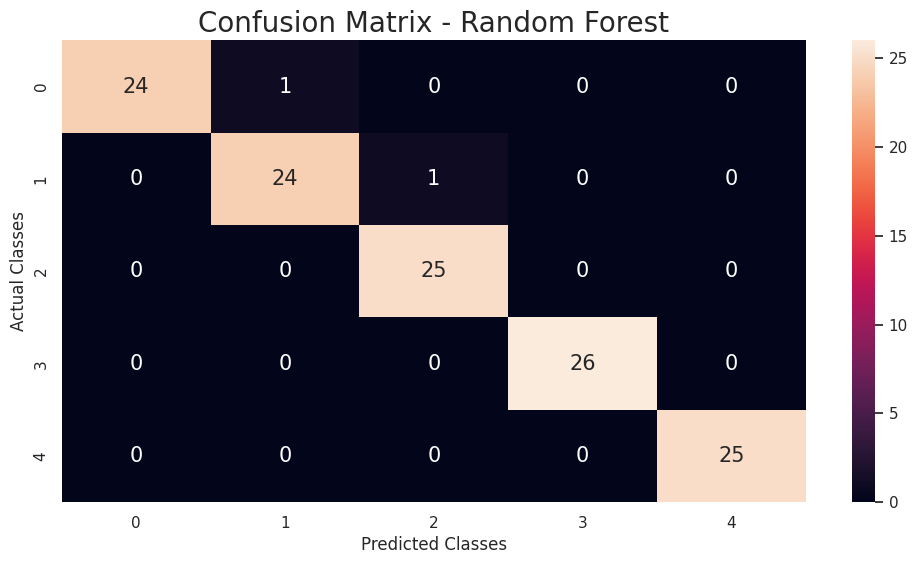

In [22]:

from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                     'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                     'sl':'stress level'}, inplace=True)

# Scale the features
X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])
X_scaled = minmax_scaling(X, columns=X.columns)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify=y, shuffle=True)

# Initialize and train the Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=rfc.classes_, index=rfc.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
p.set_title('Confusion Matrix - Random Forest', fontsize=20)
p.set_xlabel('Predicted Classes')
p.set_ylabel('Actual Classes')
plt.show()


Validation Accuracy: 96.83%


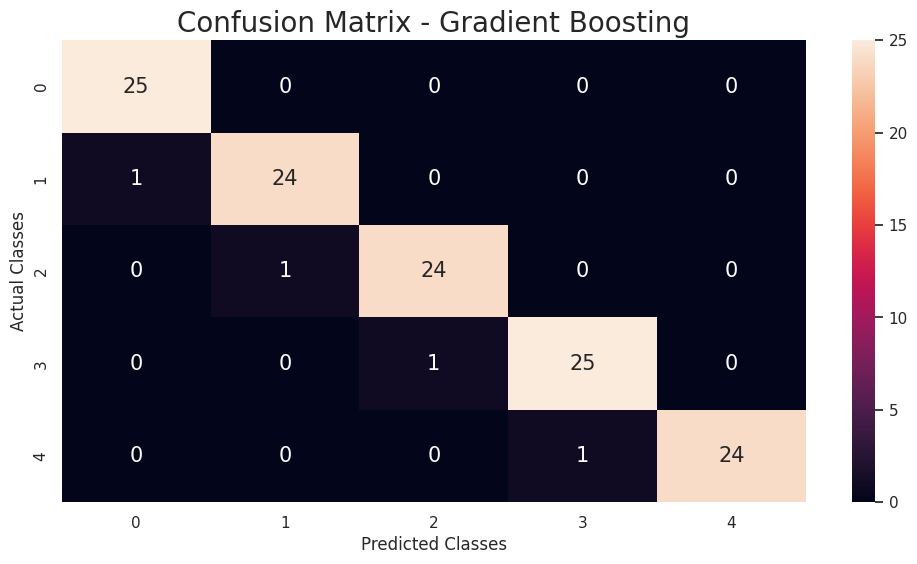

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                     'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                     'sl':'stress level'}, inplace=True)

# Scale the features
X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])
X_scaled = minmax_scaling(X, columns=X.columns)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify=y, shuffle=True)

# Initialize and train the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_valid)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=gbc.classes_, index=gbc.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
p.set_title('Confusion Matrix - Gradient Boosting', fontsize=20)
p.set_xlabel('Predicted Classes')
p.set_ylabel('Actual Classes')
plt.show()


Validation Accuracy: 96.83%


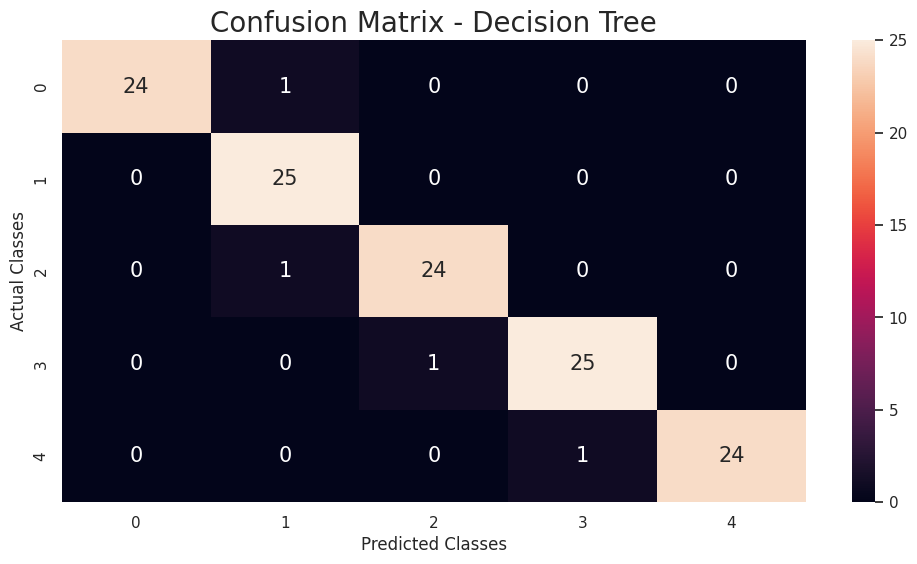

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                     'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                     'sl':'stress level'}, inplace=True)

# Scale the features
X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])
X_scaled = minmax_scaling(X, columns=X.columns)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify=y, shuffle=True)

# Initialize and train the Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=dtc.classes_, index=dtc.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
p.set_title('Confusion Matrix - Decision Tree', fontsize=20)
p.set_xlabel('Predicted Classes')
p.set_ylabel('Actual Classes')
plt.show()


Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



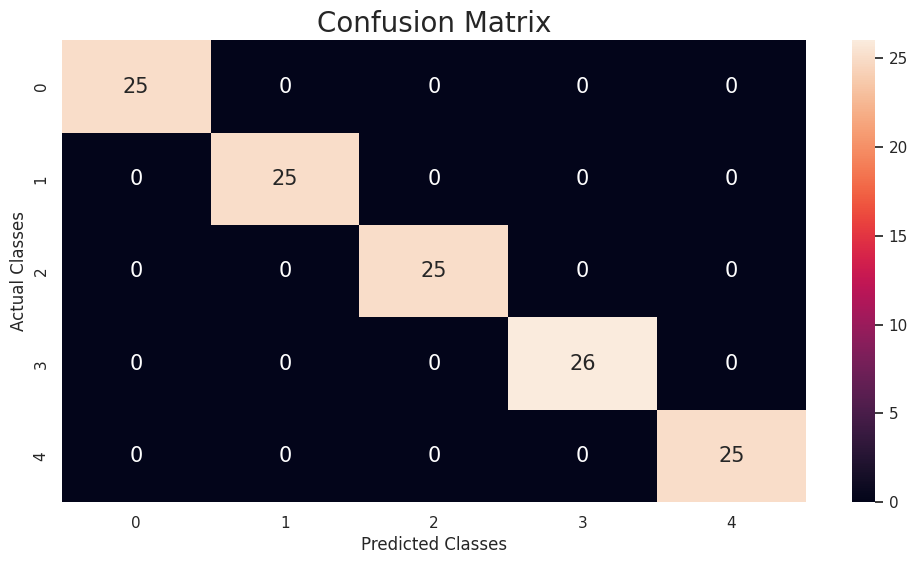

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=knn.classes_, index=knn.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Accuracy: 99.21%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



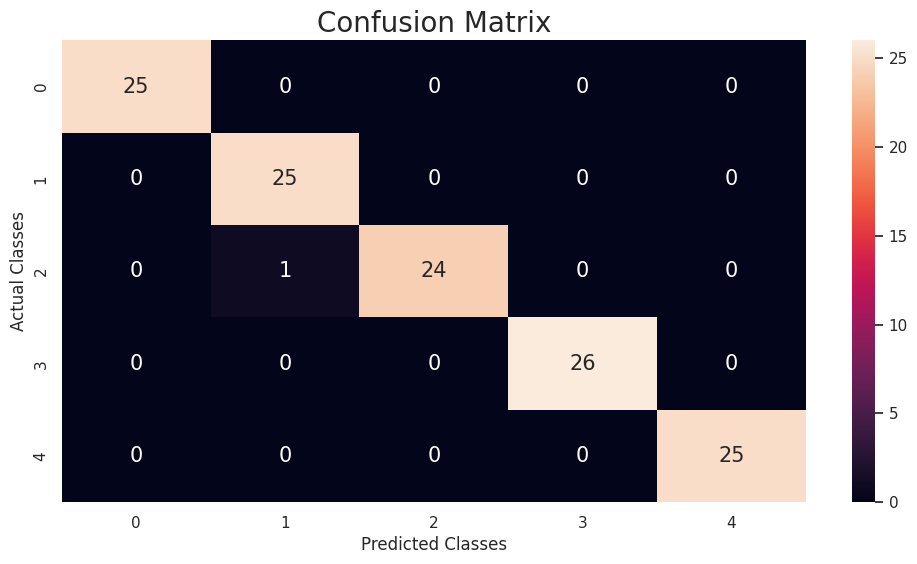

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the LinearSVC model
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the Linear SVC model
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=lsvc.classes_, index=lsvc.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



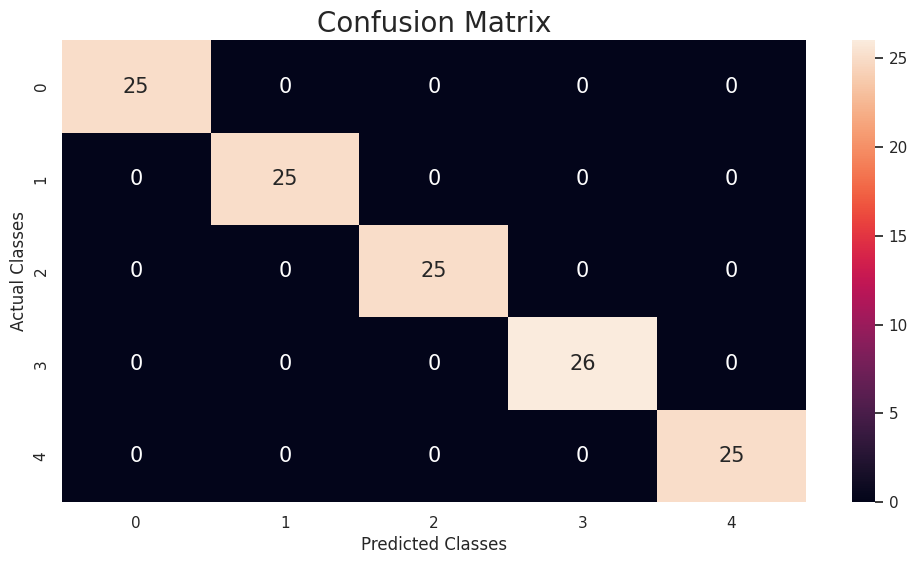

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=lr.classes_, index=lr.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



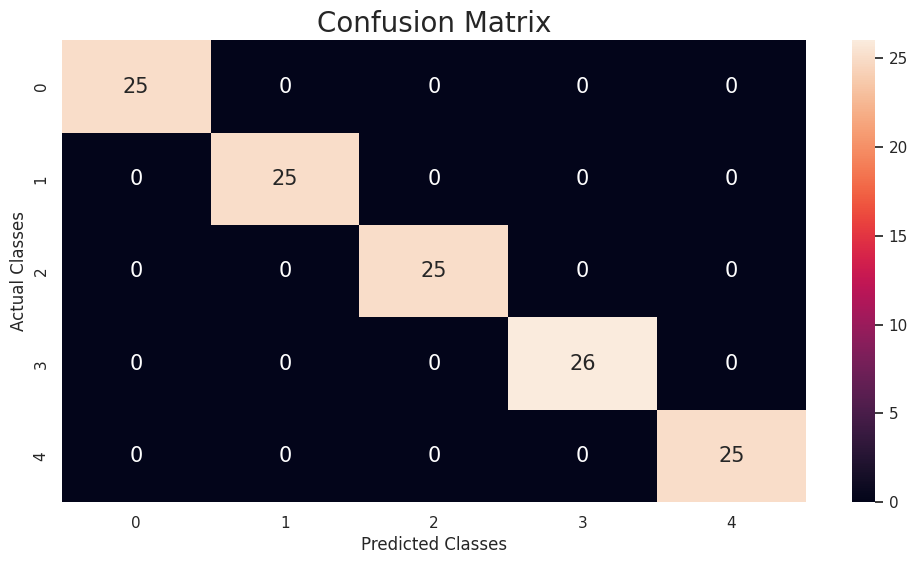

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=gnb.classes_, index=gnb.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



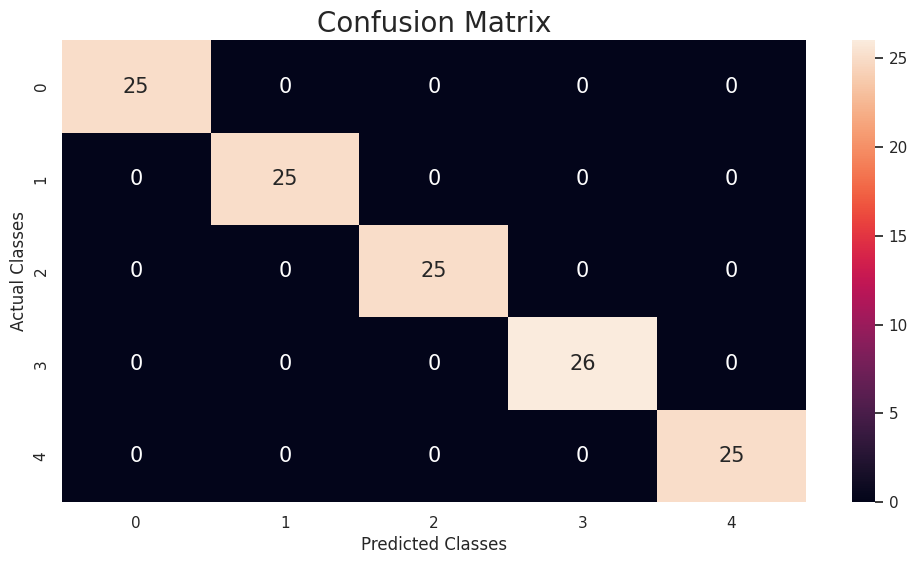

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the SVC model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the SVC model
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=svc.classes_, index=svc.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Accuracy: 85.71%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.78      1.00      0.88        25
           2       0.64      0.72      0.68        25
           3       1.00      0.58      0.73        26
           4       0.96      1.00      0.98        25

    accuracy                           0.86       126
   macro avg       0.88      0.86      0.85       126
weighted avg       0.88      0.86      0.85       126



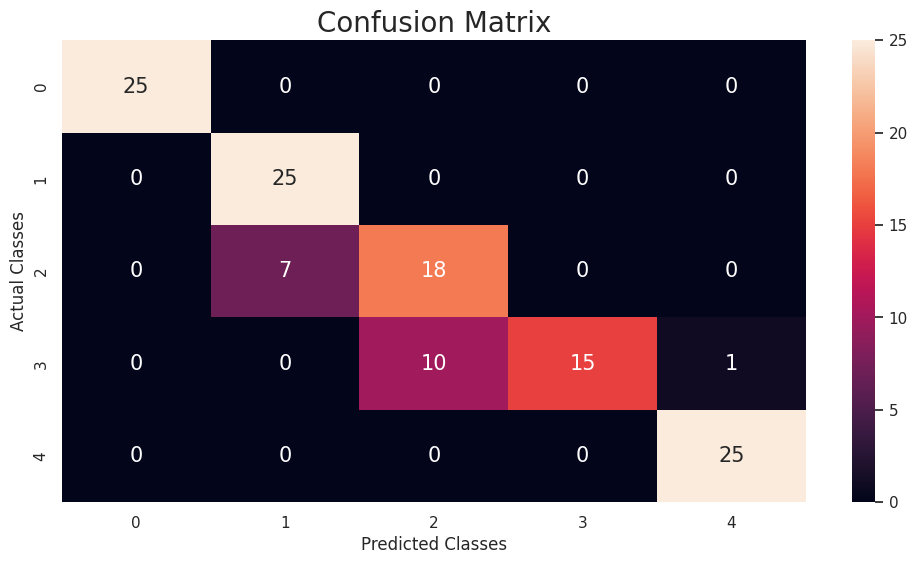

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the SGDClassifier model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Initialize and train the SGDClassifier model
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Print classification report
print('Classification Report:\n', classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=sgdc.classes_, index=sgdc.classes_)

# Plot confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


Model: Decision Tree
Accuracy: 96.83%
Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.960000  0.979592   25.000000
1              0.960000  0.960000  0.960000   25.000000
2              0.925926  1.000000  0.961538   25.000000
3              0.961538  0.961538  0.961538   26.000000
4              1.000000  0.960000  0.979592   25.000000
accuracy       0.968254  0.968254  0.968254    0.968254
macro avg      0.969493  0.968308  0.968452  126.000000
weighted avg   0.969430  0.968254  0.968397  126.000000
Confusion Matrix:
[[24  1  0  0  0]
 [ 0 24  1  0  0]
 [ 0  0 25  0  0]
 [ 0  0  1 25  0]
 [ 0  0  0  1 24]]


Model: Logistic Regression
Accuracy: 100.00%
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     25.0
1                   1.0     1.0       1.0     25.0
2                   1.0     1.0       1.0     25.0
3                   1.0     1.0       1.0     26.0
4

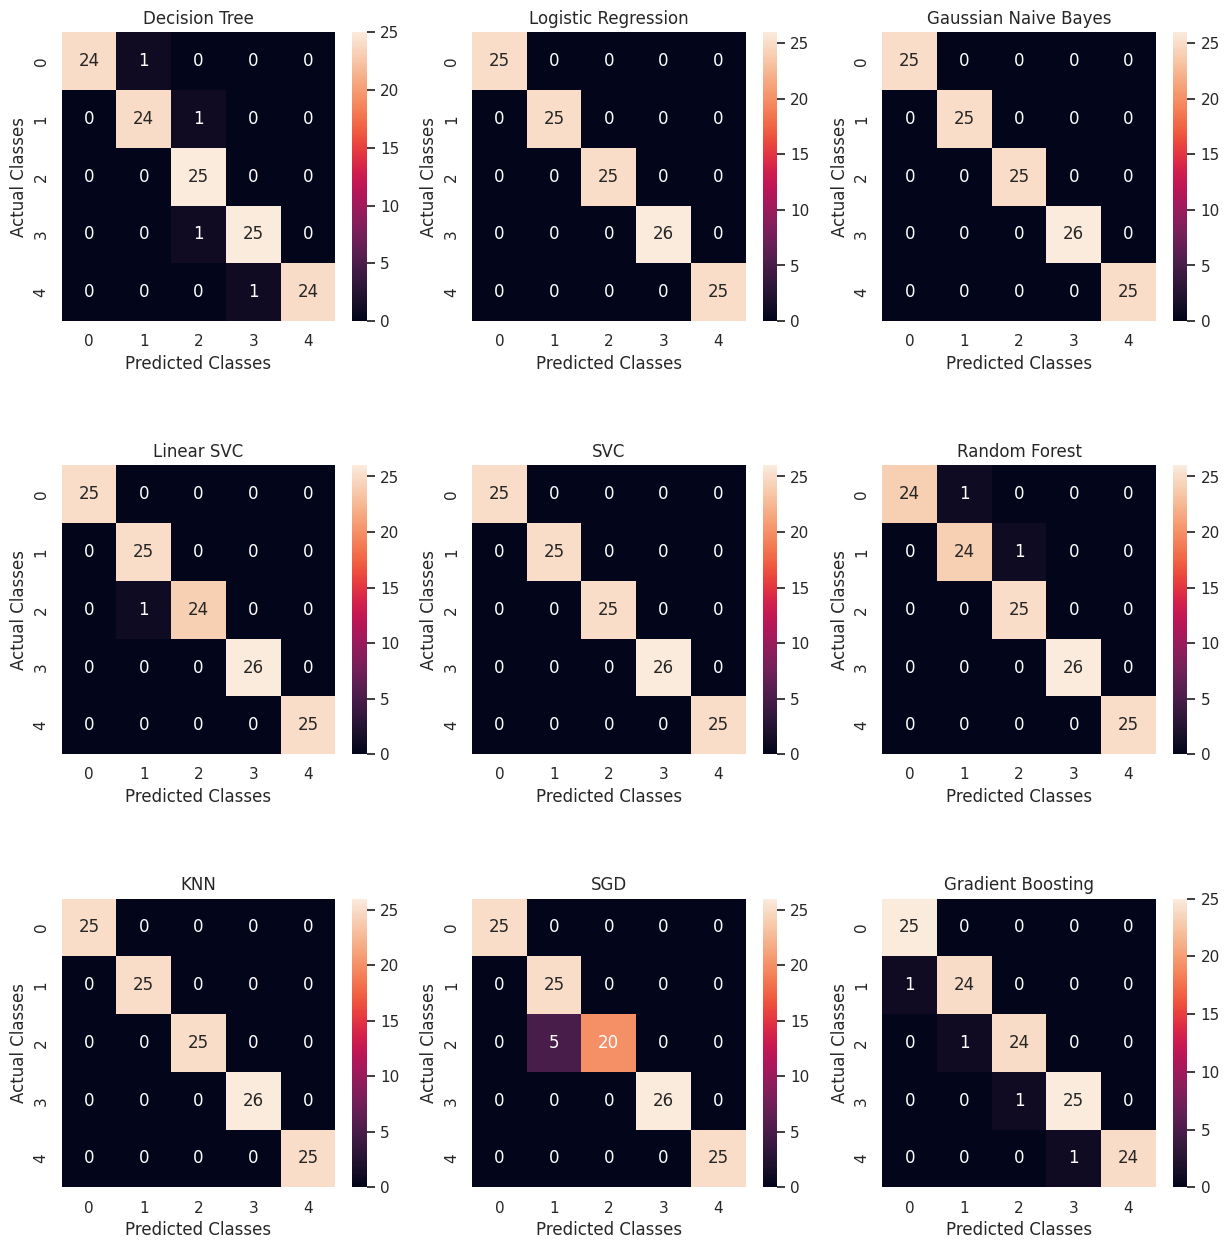

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv')

# Rename columns for clarity
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

# Feature scaling
from mlxtend.preprocessing import minmax_scaling
X = data.drop('stress level', axis=1)
y = data['stress level']
X_scaled = minmax_scaling(X, columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVC': LinearSVC(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train, predict and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred, output_dict=True)
    cm = confusion_matrix(y_valid, y_pred)
    results[name] = {'accuracy': accuracy, 'report': report, 'confusion_matrix': cm}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']*100:.2f}%")
    print("Classification Report:")
    print(pd.DataFrame(result['report']).transpose())
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("\n")

# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d", ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted Classes')
    ax.set_ylabel('Actual Classes')
plt.show()


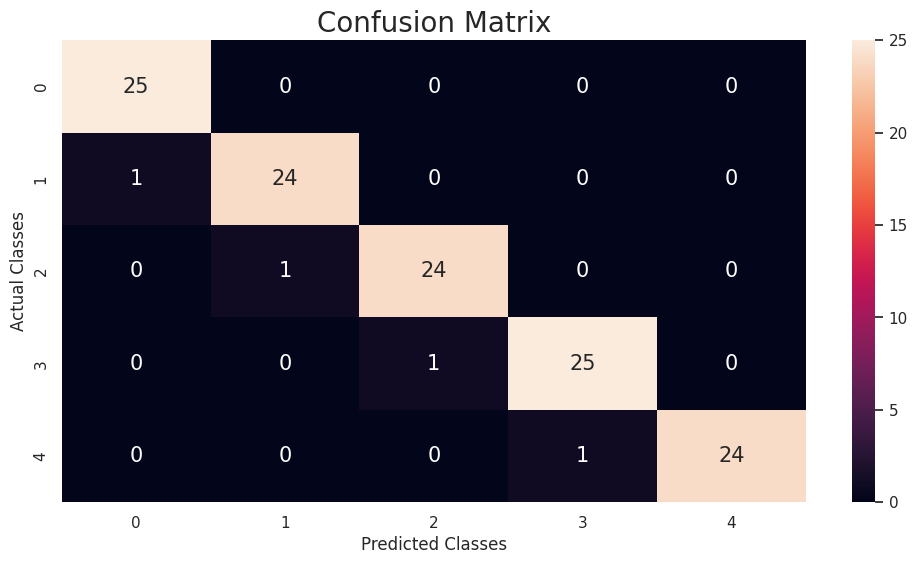

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

cm_dataframe = pd.DataFrame(cm, columns=lr.classes_, index=lr.classes_)
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');